# caQTL Benchmark

In [1]:
from pathlib import Path
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import average_precision_score, roc_auc_score
from sklearn.utils import resample

In [ ]:
tland_scores = Path('caqtl_data/TLand_scores.blood.tsv.gz')
tland_df = pd.read_table(tland_scores, compression='gzip')
tland_df

,chrom,pos,ref,alt,blood_TLand
0,chr4,149632958,G,A,0.130322
1,chr4,149632958,G,C,0.128937
2,chr4,149632958,G,T,0.128441
3,chr2,63980745,T,C,0.126277
4,chr1,233843376,T,G,0.157566
...,...,...,...,...,...
1690710,chr17,10453419,C,T,0.123984
1690711,chr17,10453964,T,A,0.121979
1690712,chr17,10453964,T,G,0.121926
1690713,chr9,73225118,G,A,0.157058


In [ ]:
vcf_df = pd.read_table('caqtl_data/cluster9.vcf', names=['chrom','pos','rsid','ref','alt'])

In [4]:
tland_df = tland_df.merge(vcf_df, on=['chrom', 'pos', 'ref', 'alt'], how='inner')
tland_df

,chrom,pos,ref,alt,blood_TLand,rsid
0,chr4,149632958,G,A,0.130322,rs6857256
1,chr4,149632958,G,C,0.128937,rs6857256
2,chr4,149632958,G,T,0.128441,rs6857256
3,chr2,63980745,T,C,0.126277,rs60044466
4,chr1,233843376,T,G,0.157566,rs57449064
...,...,...,...,...,...,...
1690710,chr17,10453419,C,T,0.123984,rs71360263
1690711,chr17,10453964,T,A,0.121979,rs3826444
1690712,chr17,10453964,T,G,0.121926,rs3826444
1690713,chr9,73225118,G,A,0.157058,rs9657736


In [ ]:
sei_features_path = Path('caqtl_data/sei_features.tsv.gz')
sei_df = pd.read_table(sei_features_path, usecols=['seqclass_max_absdiff','chrom','pos','ref','alt'], compression='gzip')
sei_df = sei_df.merge(vcf_df, on=['chrom', 'pos', 'ref', 'alt'], how='inner')
sei_df

,seqclass_max_absdiff,chrom,pos,ref,alt,rsid
0,38.242983,chr3,108406767,C,T,rs936266
1,36.599887,chr3,108406767,C,A,rs936266
2,27.738355,chr16,8655299,C,A,rs67463488
3,27.059731,chr17,59899297,T,C,rs2526354
4,26.734782,chr21,34688369,C,G,rs2236610
...,...,...,...,...,...,...
1690710,0.000149,chr2,195181876,C,A,rs190339542
1690711,0.000110,chr2,224810584,T,C,rs58777879
1690712,0.000110,chr6,80641330,C,G,rs139177832
1690713,0.000101,chr7,27505092,G,C,rs78606226


Groupby rsid and get max score:

In [6]:
tland_rsid_tland_avg = tland_df[['chrom','pos','rsid','blood_TLand']].groupby('rsid').max().reset_index()
tland_rsid_tland_avg

,rsid,chrom,pos,blood_TLand
0,rs10000000,chr4,40087276,0.129578
1,rs10000014,chr4,177525994,0.133285
2,rs10000017,chr4,83856972,0.126441
3,rs1000002,chr3,183917980,0.696816
4,rs10000030,chr4,102452997,0.721872
...,...,...,...,...
1012885,rs9999949,chr4,30971411,0.202622
1012886,rs9999953,chr4,41780979,0.119110
1012887,rs9999955,chr4,115865639,0.127196
1012888,rs9999956,chr4,15723479,0.143776


In [7]:
sei_rsid_sei_avg = sei_df.groupby('rsid')['seqclass_max_absdiff'].max().reset_index()
sei_rsid_sei_avg

,rsid,seqclass_max_absdiff
0,rs10000000,0.148795
1,rs10000014,0.039759
2,rs10000017,0.105897
3,rs1000002,0.195824
4,rs10000030,0.179276
...,...,...
1012885,rs9999949,0.062537
1012886,rs9999953,0.112523
1012887,rs9999955,0.380237
1012888,rs9999956,0.176878


In [ ]:
caQTL_cluster9_path = Path('caqtl_data/tensorqtl_cluster9_prinComp87_allChr_10.9.24.cis_qtl.txt.gz')
caQTL_cluster9_df = pd.read_table(caQTL_cluster9_path, compression='gzip')
caQTL_cluster9_df = caQTL_cluster9_df.rename(columns={'variant_id': 'rsid'})
peak_df = pd.read_table('caqtl_data/cpm_peakInfo.txt.gz', header=0, names=['phenotype_id','peak_chr','hg19.peak_start','hg19.peak_end'], compression='gzip')
caQTL_cluster9_df = caQTL_cluster9_df.merge(peak_df, on='phenotype_id', how='left')
caQTL_cluster9_df

,phenotype_id,num_var,beta_shape1,beta_shape2,true_df,pval_true_df,rsid,start_distance,end_distance,ma_samples,...,pval_nominal,slope,slope_se,pval_perm,pval_beta,qval,pval_nominal_threshold,peak_chr,hg19.peak_start,hg19.peak_end
0,peak_0,13,0.934047,10.36740,74.5384,0.050361,rs201635489,5440,4808,19,...,0.054474,-0.318850,0.163101,0.436563,0.446963,0.818190,0.000029,1,10006,10639
1,peak_1,13,1.029150,11.58830,73.8863,0.009877,rs201535981,1223,1058,35,...,0.010874,-0.431846,0.165168,0.111888,0.100780,0.648489,0.000057,1,16161,16327
2,peak_2,13,0.988963,11.58410,74.9156,0.118118,rs199745162,-456,-626,54,...,0.125570,0.254160,0.163994,0.766234,0.770320,0.869011,0.000042,1,17404,17575
3,peak_4,6,0.973847,4.70647,70.1046,0.464499,rs1342104522,9957,9777,13,...,0.458481,0.131363,0.176242,0.955045,0.949346,0.882893,0.000090,1,29266,29447
4,peak_6,16,0.976524,8.28712,69.5905,0.007437,rs369820305,-1653,-1731,80,...,0.006472,0.307205,0.109535,0.068931,0.064607,0.589288,0.000052,1,135135,135214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1652432,peak_1229396,66,0.961733,16.71830,66.0417,0.078049,rs376409704,7616,7397,91,...,0.065699,0.217192,0.116212,0.758242,0.755954,0.867335,0.000023,9,138207863,138208083
1652433,peak_1229397,52,0.968474,16.72060,66.4088,0.216306,rs78252615,-8960,-9131,59,...,0.197822,0.164461,0.126530,0.986014,0.984099,0.885921,0.000024,9,138209182,138209354
1652434,peak_1229398,48,1.025520,16.13190,63.1476,0.004755,rs10780204,-3784,-4237,93,...,0.002561,0.342477,0.109584,0.063936,0.068583,0.597239,0.000040,9,138211677,138212131
1652435,peak_1229399,47,0.958501,19.19750,68.3101,0.030283,rs201519992,-9762,-9849,74,...,0.026113,-0.271605,0.119576,0.451548,0.466165,0.822338,0.000019,9,138212364,138212452


In [9]:
main_df = tland_rsid_tland_avg.merge(caQTL_cluster9_df, on='rsid', how='left')
main_df = main_df.merge(sei_rsid_sei_avg, on='rsid', how='left')
main_df['inside_peak'] = (main_df['start_distance'] * main_df['end_distance']) < 0
main_df['peak_length'] = main_df['hg19.peak_end'] - main_df['hg19.peak_start']
main_df['distance_to_peak_midpoint'] = abs((main_df['start_distance'] + main_df['end_distance']) / 2).astype(int)
main_df

,rsid,chrom,pos,blood_TLand,phenotype_id,num_var,beta_shape1,beta_shape2,true_df,pval_true_df,...,pval_beta,qval,pval_nominal_threshold,peak_chr,hg19.peak_start,hg19.peak_end,seqclass_max_absdiff,inside_peak,peak_length,distance_to_peak_midpoint
0,rs10000000,chr4,40087276,0.129578,peak_536947,40,1.042500,6.80645,58.8959,0.012964,...,0.075425,0.609633,0.000107,4,40084001,40084073,0.148795,False,72,3238
1,rs10000000,chr4,40087276,0.129578,peak_536949,41,0.994762,7.16284,63.7100,0.423836,...,0.980924,0.885548,0.000070,4,40085147,40085789,0.148795,False,642,1807
2,rs10000014,chr4,177525994,0.133285,peak_637495,32,1.022460,7.00929,64.9653,0.117937,...,0.575410,0.843162,0.000089,4,177528318,177528950,0.039759,False,632,2640
3,rs10000017,chr4,83856972,0.126441,peak_566337,51,0.964671,7.50055,63.7660,0.165272,...,0.753644,0.867125,0.000052,4,83854450,83855903,0.105897,False,1453,1795
4,rs1000002,chr3,183917980,0.696816,peak_497598,53,1.009770,6.45754,63.6184,0.031946,...,0.185529,0.722383,0.000088,3,183927567,183927636,0.195824,False,69,9622
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1387881,rs9999953,chr4,41780979,0.119110,peak_538549,59,0.952771,5.71492,66.2235,0.059031,...,0.315075,0.780365,0.000062,4,41777185,41777436,0.112523,False,251,3668
1387882,rs9999955,chr4,115865639,0.127196,peak_590500,46,0.990249,4.71440,65.0744,0.060831,...,0.260213,0.759853,0.000103,4,115863340,115863497,0.380237,False,157,2220
1387883,rs9999956,chr4,15723479,0.143776,peak_519961,69,0.971058,8.92578,68.3101,0.021705,...,0.188724,0.724250,0.000047,4,15721906,15722230,0.176878,False,324,1410
1387884,rs9999956,chr4,15723479,0.143776,peak_519965,78,0.988153,9.10299,65.4902,0.116418,...,0.680450,0.858557,0.000053,4,15724773,15726283,0.176878,False,1510,2049


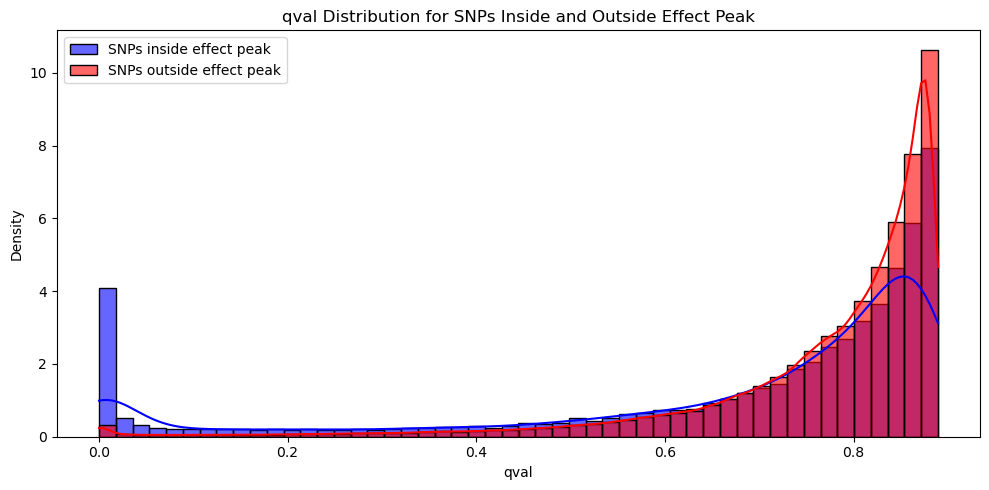

In [14]:
plt.figure(figsize=(10, 5))
sns.histplot(main_df.loc[main_df['inside_peak']==True, 'qval'], color='blue', label='SNPs inside effect peak', kde=True, stat='density', bins=50, alpha=0.6)
sns.histplot(main_df.loc[main_df['inside_peak']==False, 'qval'], color='red', label='SNPs outside effect peak', kde=True, stat='density', bins=50, alpha=0.6)
plt.xlabel('qval')
plt.ylabel('Density')
plt.title('qval Distribution for SNPs Inside and Outside Effect Peak')
plt.legend()
plt.tight_layout()
plt.show()

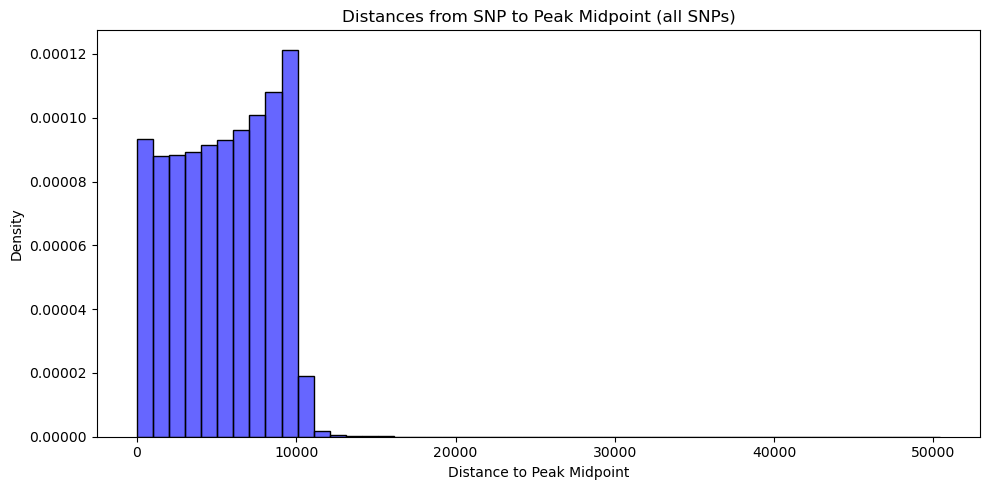

In [15]:
plt.figure(figsize=(10, 5))
sns.histplot(main_df['distance_to_peak_midpoint'], color='blue', kde=False, stat='density', bins=50, alpha=0.6)
plt.xlabel('Distance to Peak Midpoint')
plt.ylabel('Density')
plt.title('Distances from SNP to Peak Midpoint (all SNPs)')
plt.tight_layout()
plt.show()

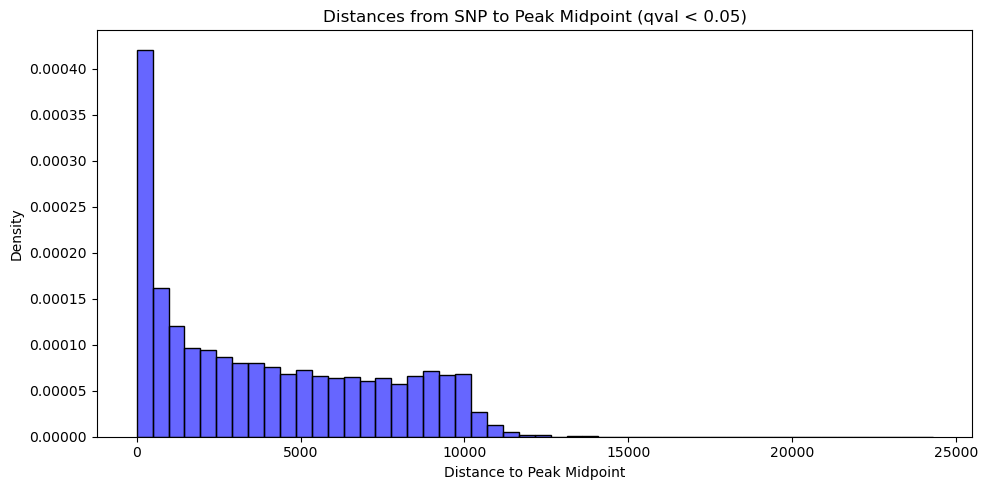

In [16]:
plt.figure(figsize=(10, 5))
sns.histplot(main_df.loc[main_df['qval'] < 0.05, 'distance_to_peak_midpoint'], color='blue', kde=False, stat='density', bins=50, alpha=0.6)
plt.xlabel('Distance to Peak Midpoint')
plt.ylabel('Density')
plt.title('Distances from SNP to Peak Midpoint (qval < 0.05)')
plt.tight_layout()
plt.show()

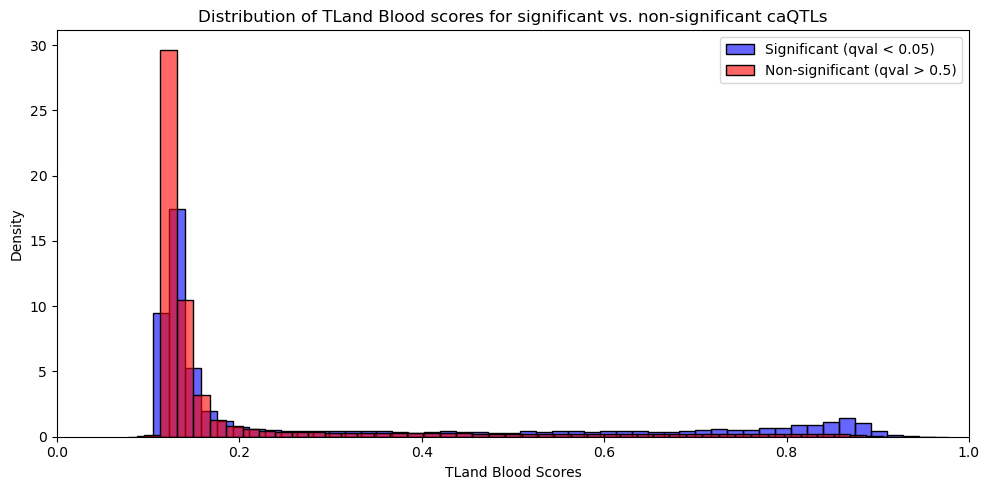

In [16]:
plt.figure(figsize=(10, 5))
sns.histplot(main_df.loc[main_df['qval'] < 0.05, 'blood_TLand'], color='blue', label='Significant (qval < 0.05)', kde=False, stat='density', bins=50, alpha=0.6)
sns.histplot(main_df.loc[main_df['qval'] > 0.5, 'blood_TLand'], color='red', label='Non-significant (qval > 0.5)', kde=False, stat='density', bins=50, alpha=0.6)
plt.xlabel('TLand Blood Scores')
plt.ylabel('Density')
plt.title('Distribution of TLand Blood scores for significant vs. non-significant caQTLs')
plt.xlim(0, 1)
plt.legend()
plt.tight_layout()
plt.show()

## Establish positive and negative caQTL set

### NOT USING - positive and negative caQTLs from the same peak

- Positive caQTL: qval<0.05
- Negative caQTL: From each positive's peak, get SNPs with qval>0.5

NVM ALL POSITIVES ARE ALONE IN THEIR PEAKS

In [18]:
# positives_df = main_df[main_df['qval']<0.05]
# peaks_w_positives = positives_df['phenotype_id'].drop_duplicates().to_list()

In [19]:
# snps_per_pos_peak = []
# for peak in tqdm(peaks_w_positives):
#     peak_df = main_df[main_df['phenotype_id'] == peak]
#     snps_per_pos_peak.append(len(peak_df))
#     # negatives_df = peak_df[peak_df['qval'] > 0.5]    

In [20]:
# sns.histplot(snps_per_pos_peak, kde=True, stat='density', bins=50, color='green', alpha=0.6)

### USING - Positive and negative caQTLs inside peak and within 100bp from peak center

In [10]:
peak_snps_100bp_from_midpoint = main_df[(main_df['distance_to_peak_midpoint'] <= 100) & (main_df['inside_peak'] == True)].copy()
peak_snps_100bp_from_midpoint = peak_snps_100bp_from_midpoint[(peak_snps_100bp_from_midpoint['qval'] < 0.05) | (peak_snps_100bp_from_midpoint['qval'] > 0.5)]
peak_snps_100bp_from_midpoint['caQTL'] = peak_snps_100bp_from_midpoint['qval'] < 0.05

In [34]:
peak_snps_100bp_from_midpoint

,rsid,chrom,pos,blood_TLand,phenotype_id,num_var,beta_shape1,beta_shape2,true_df,pval_true_df,...,qval,pval_nominal_threshold,peak_chr,hg19.peak_start,hg19.peak_end,seqclass_max_absdiff,inside_peak,peak_length,distance_to_peak_midpoint,caQTL
79,rs10000748,chr4,128161336,0.430754,peak_599598,26,0.937885,5.01022,72.6618,4.152290e-02,...,7.400450e-01,0.000062,4,128161039,128161584,0.899979,True,545,24,False
139,rs10001254,chr4,108446444,0.151652,peak_584566,58,1.024120,13.38180,67.0156,3.678320e-03,...,5.382880e-01,0.000047,4,108445756,108447150,0.059174,True,1394,9,False
181,rs10001630,chr4,104100487,0.118292,peak_581278,38,0.921827,5.11059,74.8779,1.425930e-01,...,8.436630e-01,0.000053,4,104100439,104100497,0.015689,True,58,18,False
528,rs10004568,chr4,173932188,0.154202,peak_634376,37,0.977061,10.45430,66.7150,1.015310e-01,...,8.588470e-01,0.000042,4,173932096,173932200,0.141592,True,104,39,False
611,rs10005292,chr4,134204363,0.128795,peak_603262,67,0.957314,6.65231,63.9708,7.494700e-02,...,8.126730e-01,0.000056,4,134204208,134204442,0.030580,True,234,37,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1387290,rs9995389,chr4,150032696,0.127762,peak_615359,53,0.930003,9.39835,70.4093,1.129890e-02,...,6.721650e-01,0.000031,4,150032364,150032874,1.173291,True,510,76,False
1387410,rs9996250,chr4,104770777,0.127195,peak_581719,40,0.962961,6.59779,65.6726,9.804630e-13,...,1.307020e-08,0.000059,4,104769713,104771809,0.195449,True,2096,15,True
1387415,rs9996334,chr4,116539877,0.649695,peak_590915,61,1.003080,5.54635,62.9199,8.650260e-03,...,5.453430e-01,0.000097,4,116539797,116540097,0.093175,True,300,70,False
1387734,rs999881,chr14,57061918,0.117765,peak_1600767,56,1.019360,11.19830,62.6358,6.693220e-02,...,8.354220e-01,0.000055,14,57061858,57061950,0.162882,True,92,13,False


In [11]:
# Count positive and negative SNPs
print(f"Number of positive SNPs: {peak_snps_100bp_from_midpoint['caQTL'].sum()}")
print(f"Number of negative SNPs: {len(peak_snps_100bp_from_midpoint) - peak_snps_100bp_from_midpoint['caQTL'].sum()}")

Number of positive SNPs: 880
Number of negative SNPs: 9830


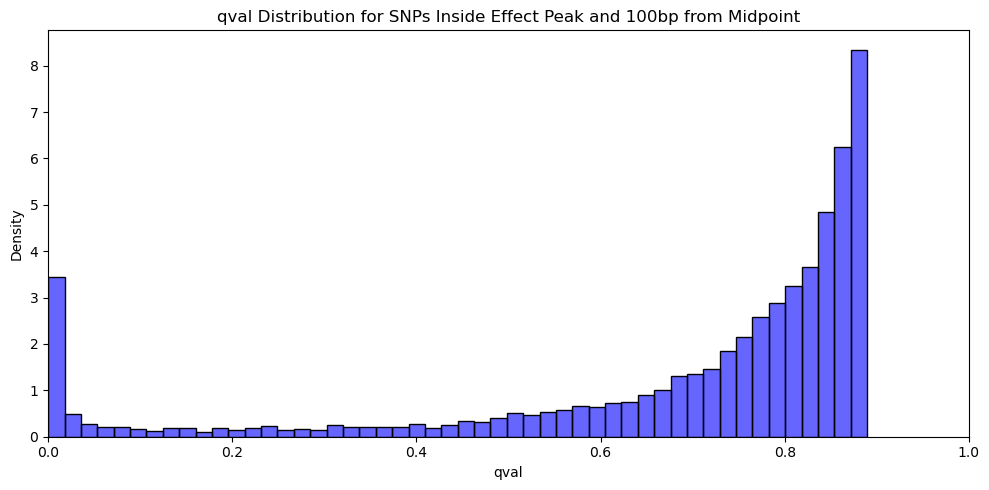

In [23]:
plt.figure(figsize=(10, 5))
sns.histplot(peak_snps_100bp_from_midpoint['qval'], color='blue', kde=False, stat='density', bins=50, alpha=0.6)
plt.xlabel('qval')
plt.ylabel('Density')
plt.title('qval Distribution for SNPs Inside Effect Peak and 100bp from Midpoint')
plt.xlim(0, 1)
plt.tight_layout()
plt.show()

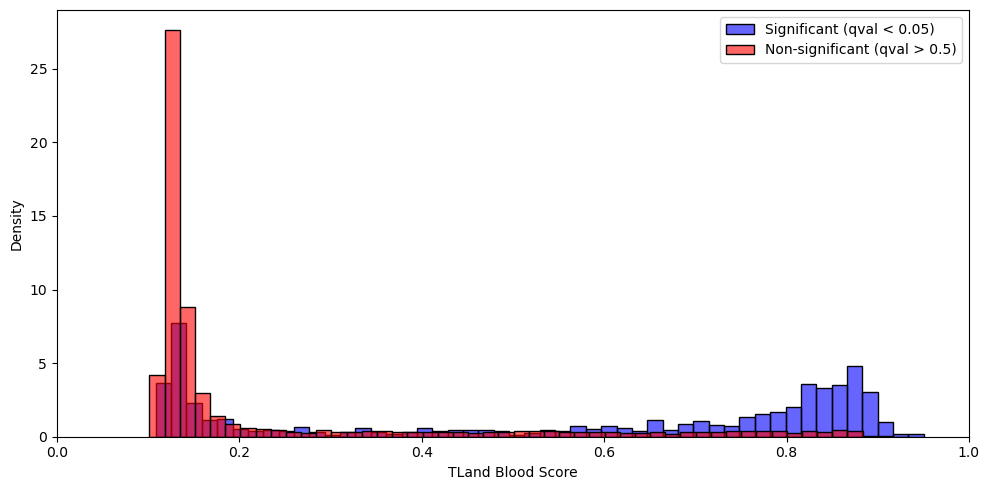

In [16]:
plt.figure(figsize=(10, 5))
sns.histplot(peak_snps_100bp_from_midpoint.loc[peak_snps_100bp_from_midpoint['qval'] < 0.05, 'blood_TLand'], color='blue', label='Significant (qval < 0.05)', kde=False, stat='density', bins=50, alpha=0.6)
sns.histplot(peak_snps_100bp_from_midpoint.loc[peak_snps_100bp_from_midpoint['qval'] > 0.5, 'blood_TLand'], color='red', label='Non-significant (qval > 0.5)', kde=False, stat='density', bins=50, alpha=0.6)
plt.xlabel('TLand Blood Score')
plt.ylabel('Density')
# plt.title('Distribution of TLand Blood scores for significant vs. non-significant caQTLs\n(After Filtering for 100bp from Peak Midpoint)')
plt.xlim(0, 1)
plt.legend()
plt.tight_layout()
plt.show()

Figure 3b

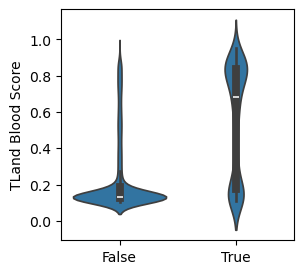

In [ ]:
plt.figure(figsize=(3, 3))
sns.violinplot(peak_snps_100bp_from_midpoint, 
               x='caQTL', 
               y='blood_TLand',
               width=0.8)
plt.xlabel('')
plt.ylabel('TLand Blood Score')
plt.show()

In [12]:
def bootstrap_auprc(y_true, y_score, n_bootstrap=1000, random_state=42):
    rng = np.random.RandomState(random_state)
    scores = []
    for _ in range(n_bootstrap):
        idx = rng.choice(len(y_true), len(y_true), replace=True)
        score = average_precision_score(y_true[idx], y_score[idx])
        scores.append(score)
    mean_score = np.mean(scores)
    ci_lower = np.percentile(scores, 2.5)
    ci_upper = np.percentile(scores, 97.5)
    return mean_score, ci_lower, ci_upper

def bootstrap_auroc(y_true, y_score, n_bootstrap=1000, random_state=42):
    rng = np.random.RandomState(random_state)
    scores = []
    for _ in range(n_bootstrap):
        idx = rng.choice(len(y_true), len(y_true), replace=True)
        score = roc_auc_score(y_true[idx], y_score[idx])
        scores.append(score)
    mean_score = np.mean(scores)
    ci_lower = np.percentile(scores, 2.5)
    ci_upper = np.percentile(scores, 97.5)
    return mean_score, ci_lower, ci_upper

mean_tland_auprc, tland_auprc_ci_lower, tland_auprc_ci_upper = bootstrap_auprc(peak_snps_100bp_from_midpoint['caQTL'].values, peak_snps_100bp_from_midpoint['blood_TLand'].values)
mean_sei_auprc, sei_auprc_ci_lower, sei_auprc_ci_upper = bootstrap_auprc(peak_snps_100bp_from_midpoint['caQTL'].values, peak_snps_100bp_from_midpoint['seqclass_max_absdiff'].values)

mean_tland_auroc, tland_auroc_ci_lower, tland_auroc_ci_upper = bootstrap_auroc(peak_snps_100bp_from_midpoint['caQTL'].values, peak_snps_100bp_from_midpoint['blood_TLand'].values)
mean_sei_auroc, sei_auroc_ci_lower, sei_auroc_ci_upper = bootstrap_auroc(peak_snps_100bp_from_midpoint['caQTL'].values, peak_snps_100bp_from_midpoint['seqclass_max_absdiff'].values)

Figure 3c

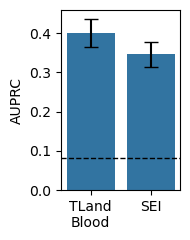

In [ ]:
# Plot AUPRC
plt.figure(figsize=(2, 2.5))
sns.barplot(x=['TLand\nBlood', 'SEI'], y=[mean_tland_auprc, mean_sei_auprc])
plt.errorbar([0, 1], [mean_tland_auprc, mean_sei_auprc], 
             yerr=[[mean_tland_auprc - tland_auprc_ci_lower, mean_sei_auprc - sei_auprc_ci_lower],
                   [tland_auprc_ci_upper - mean_tland_auprc, sei_auprc_ci_upper - mean_sei_auprc]], 
             fmt='none', ecolor='black', capsize=5)
plt.axhline(peak_snps_100bp_from_midpoint['caQTL'].mean(), color='black', linestyle='--', linewidth=1)
plt.ylabel('AUPRC')
plt.tight_layout()
plt.show()

Figure 3d

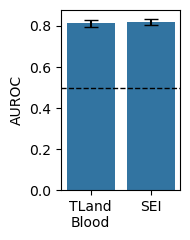

In [ ]:
# Plot AUROC
plt.figure(figsize=(2, 2.5))
sns.barplot(x=['TLand\nBlood', 'SEI'], y=[mean_tland_auroc, mean_sei_auroc])
plt.errorbar([0, 1], [mean_tland_auroc, mean_sei_auroc], yerr=[[mean_tland_auroc - tland_auroc_ci_lower, mean_sei_auroc - sei_auroc_ci_lower],
                   [tland_auroc_ci_upper - mean_tland_auroc, sei_auroc_ci_upper - mean_sei_auroc]], 
                   fmt='none', ecolor='black', capsize=5)
plt.axhline(0.5, color='black', linestyle='--', linewidth=1)
plt.ylabel('AUROC')
plt.tight_layout()
plt.show()